In [21]:
from pkg_req import *
from construction import *
from solver import *
from backend import *
from pulses import *
from fidelity import *
from initialization import *

# **Verifying the rotations work for each of the 2 qubits**

# Qubit 0
- Side note: If acquiring to make sure the state is $\ket{1}$, the acquire operation position in the circuit somewhat matters. For example, below the first case we acquire the pulse on channel 0 *before* the initialization of the pulse on qubit 1

{np.str_('0'): np.int64(1), np.str_('1'): np.int64(999)}


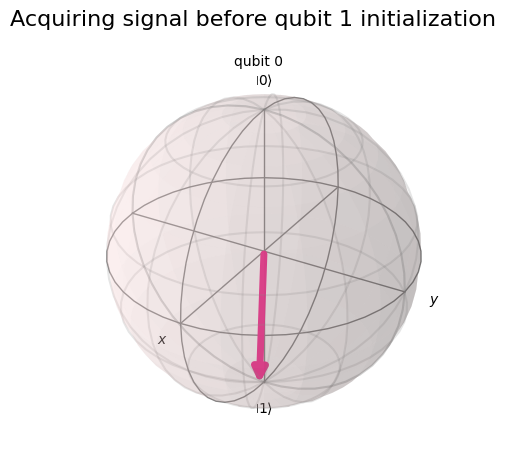

In [72]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(1))
        #pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
plot_bloch_multivector(amp_prob, title='Acquiring signal before qubit 1 initialization')

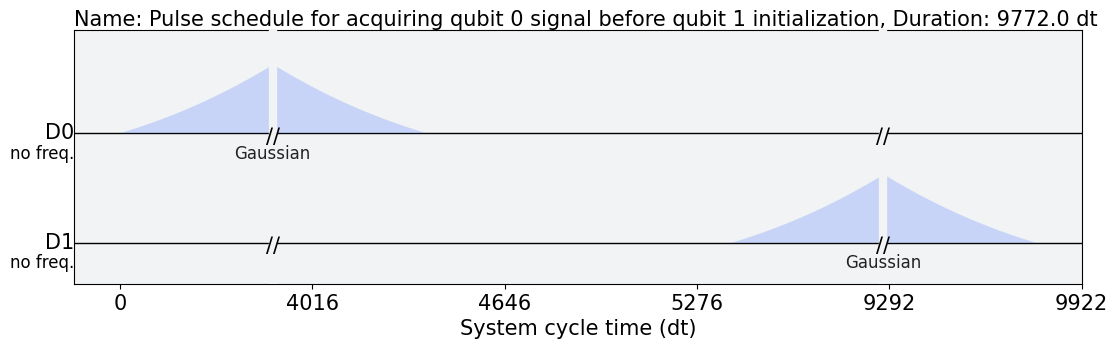

In [73]:
sxp.draw()

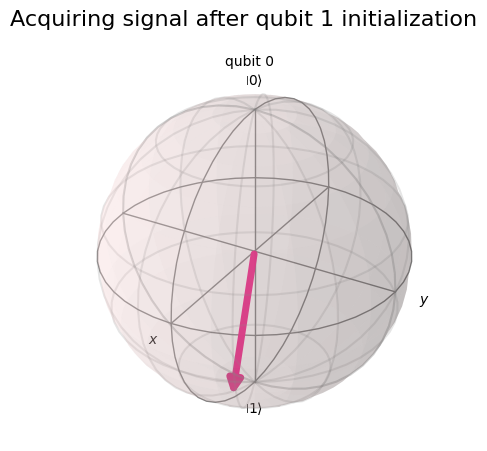

In [74]:
sxp=[]
with pulse.build(backend=backend, name='') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        #pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(1))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
#print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
plot_bloch_multivector(amp_prob, title='Acquiring signal after qubit 1 initialization')

# Qubit 1

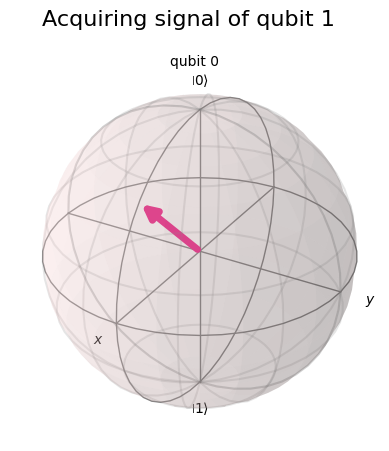

In [75]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        #pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(1))
        pulse.acquire(duration=1000, qubit_or_channel=1, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
#print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
plot_bloch_multivector(amp_prob, title='Acquiring signal of qubit 1')

- Qubit zero has impacted the $\ket{0} \rightarrow \ket{1}$ state flip of qubit 1, so need to adjust parameters for qubit 1:

{np.str_('0'): np.int64(5), np.str_('1'): np.int64(995)}


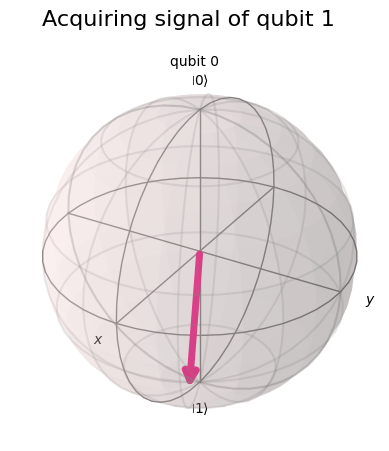

In [115]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 1 signal') as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        #pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
        pulse.play(pulse.library.Gaussian(3000, 0.22,1000), pulse.DriveChannel(1))
        pulse.acquire(duration=1000, qubit_or_channel=1, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
required_keys = ['0', '1']
for key in required_keys:
    counts.setdefault(key, 0)
counts = {'0': int(counts['0']), '1': int(counts['1'])} 
total_shots = sum(counts.values())
probabilities = {state: np.sqrt(count/total_shots) for state, count in counts.items()}
amp_prob=[probabilities['0'],probabilities['1']]
plot_bloch_multivector(amp_prob, title='Acquiring signal of qubit 1')

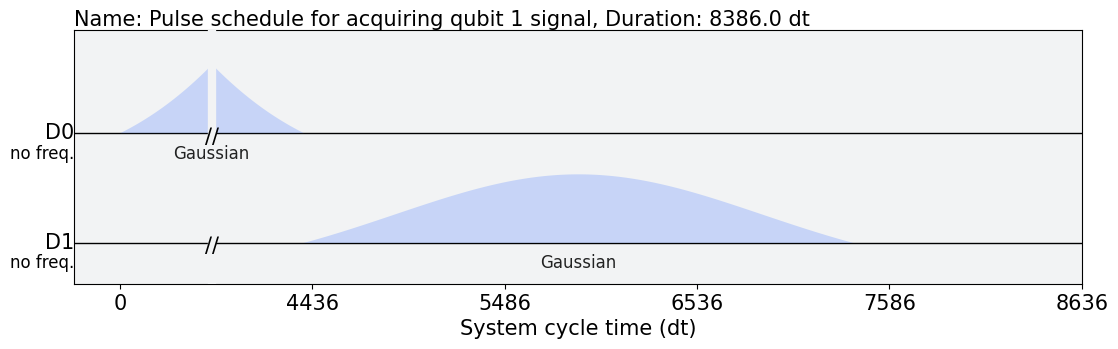

In [116]:
sxp.draw()

# **Functions for circuit construction**

# Creating callable functions the initialize the states of either or both qubits at the beginning of a pulse circuit

- Ry10(): flip qubit 0 to $\ket{1}$, qubit 1 remains in $\ket{0}$
- R01(): flip qubit 1 to $\ket{1}$, qubit 0 remains in $\ket{0}$
- R11(): flip both qubit 0 and 1 to $\ket{1}$

These now exist as callable functions in pulses.py

In [150]:
def Ry10():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))

def Ry01():
        pulse.play(pulse.library.Gaussian(3000, 0.22,1000), pulse.DriveChannel(1))
        pulse.acquire(duration=1000, qubit_or_channel=1, register=pulse.MemorySlot(0))


def Ry11():
        pulse.play(pulse.library.Gaussian(4386, 0.7, 1000), pulse.DriveChannel(0))
        pulse.play(pulse.library.Gaussian(3000, 0.22,1000), pulse.DriveChannel(1))
        #pulse.acquire(duration=1000, qubit_or_channel=1, register=pulse.MemorySlot(0))
        #pulse.measure_all()

# Ry01() test

{np.str_('0'): np.int64(1), np.str_('1'): np.int64(999)}


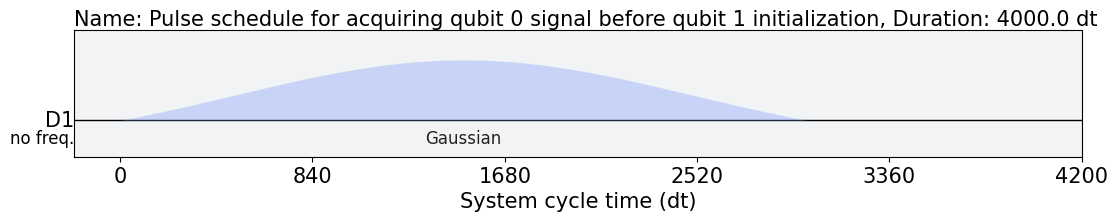

In [136]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        Ry01()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
sxp.draw()

# R10() test

{np.str_('0'): np.int64(1), np.str_('1'): np.int64(999)}


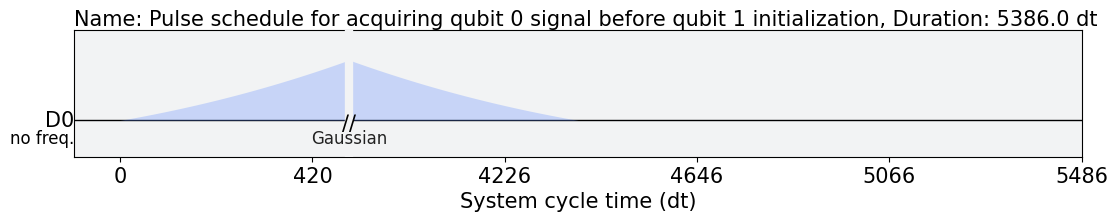

In [137]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        Ry10()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
sxp.draw()

# Ry11() test

Acquiring counts from qubit 0:

{np.str_('0'): np.int64(3), np.str_('1'): np.int64(997)}


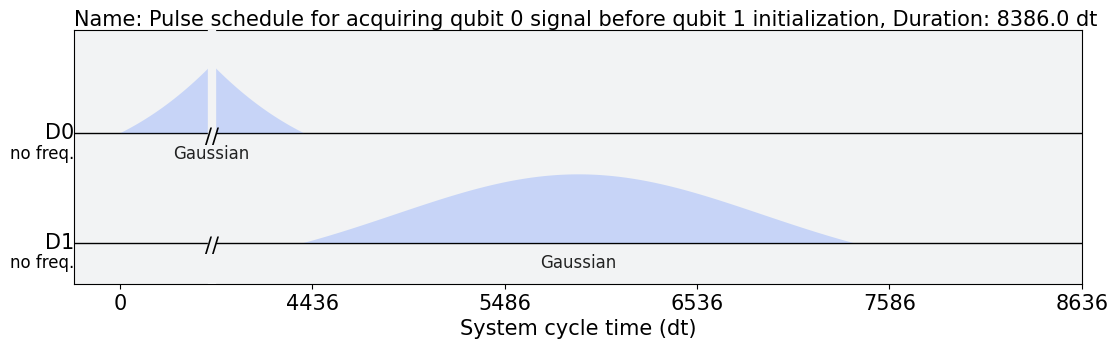

In [148]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        Ry11()
        pulse.acquire(duration=1000, qubit_or_channel=0, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
sxp.draw()

Acquiring counts from qubit 1:

{np.str_('0'): np.int64(2), np.str_('1'): np.int64(998)}


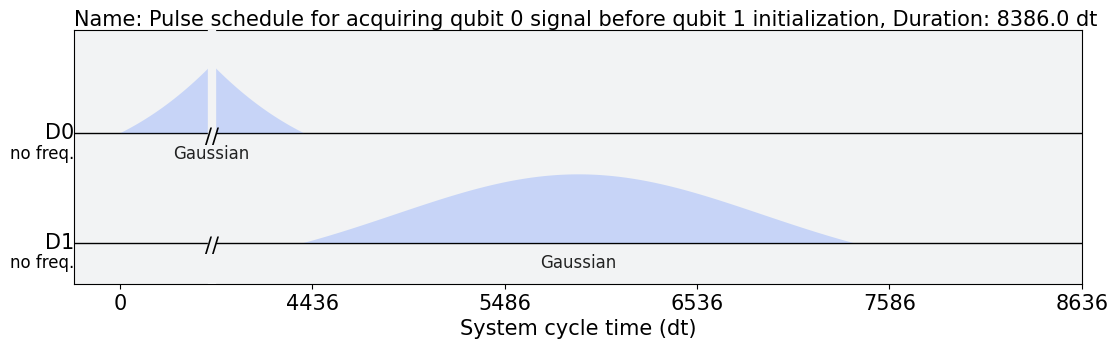

In [149]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        Ry11()
        pulse.acquire(duration=1000, qubit_or_channel=1, register=pulse.MemorySlot(0))
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
sxp.draw()

and measure all:

{np.str_('01'): np.int64(3), np.str_('10'): np.int64(4), np.str_('11'): np.int64(993)}


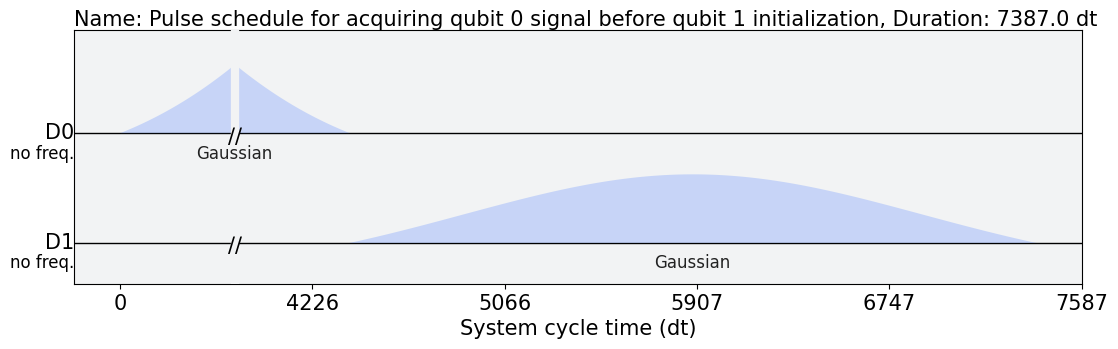

In [151]:
sxp=[]
with pulse.build(backend=backend, name='Pulse schedule for acquiring qubit 0 signal before qubit 1 initialization') as sxp:
    with pulse.align_sequential():
        Ry11()
        pulse.measure_all()
job = backend.run(sxp, shots=1000)
result = job.result()
counts=result.get_counts()
print(counts)
sxp.draw()

# Updated fidelity functions which return the infidelity as a cost function for circuit parameter optimization.  Now includes an additional loop to replace the probability array with one that includes a 0 for any states with zero measurements

- calculate_fidelity_circ_2s(): returns infidelity for a 1 qubit system (0 and 1 states)
- calculate_fidelity_circ_4s(): returns infidelity for a 2 qubit system (00,01,10,11 states)
These now exists in fidelity.py

In [133]:
def calculate_fidelity_circ_2s(pulse_params):
    test=pulse_circ(*pulse_params)
    required_keys = ['0', '1']
    for key in required_keys:
        test.setdefault(key, 0)
    counts = {'0': int(test['0']), '1': int(test['1'])} 
    total_shots = sum(counts.values())
    probabilities = {state: count / total_shots for state, count in counts.items()}
    num_states = 2 
    measured_density_matrix = np.zeros((num_states, num_states), dtype=complex)
    states = ['0','1']  
    for i, state in enumerate(states):
        prob = probabilities.get(state, 0)  # Prob for each state
        # |state><state|
        outer_product = np.outer(np.array([1 if j == i else 0 for j in range(num_states)]), 
                                 np.array([1 if j == i else 0 for j in range(num_states)]))
        measured_density_matrix += prob * outer_product
    #Convert to DensityMatrix object
    rho_measured = DensityMatrix(measured_density_matrix)#measured_density_matrix#DensityMatrix(measured_density_matrix)
    fidelity = state_fidelity(rho_measured, des_state,validate=False)
    infid=1-np.abs(fidelity) 
    #infid_dat.append(infid)
    print('infidelity: '+str(infid))
    return infid 

def calculate_fidelity_circ_4s(pulse_params):
    test=pulse_circ_2q(*pulse_params)
    required_keys = ['00', '01', '10', '11']
    for key in required_keys:
        test.setdefault(key, 0)
    counts = {'00': int(test['00']), '01': int(test['01']), '10': int(test['10']), '11': int(test['11'])} 
    total_shots = sum(counts.values())
    probabilities = {state: count / total_shots for state, count in counts.items()}
    num_states = 4 
    measured_density_matrix = np.zeros((num_states, num_states), dtype=complex)
    states = ['00', '01', '10', '11']  
    for i, state in enumerate(states):
        prob = probabilities.get(state, 0)  # Prob for each state
        # |state><state|
        outer_product = np.outer(np.array([1 if j == i else 0 for j in range(num_states)]), 
                                 np.array([1 if j == i else 0 for j in range(num_states)]))
        measured_density_matrix += prob * outer_product
    #Convert to DensityMatrix object
    rho_measured = DensityMatrix(measured_density_matrix)#measured_density_matrix#DensityMatrix(measured_density_matrix)
    fidelity = state_fidelity(rho_measured, des_state,validate=False)
    infid=1-np.abs(fidelity) 
    #infid_dat.append(infid)
    print('infidelity: '+str(infid) )
    return infid